In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from groq import Groq
from dotenv import load_dotenv
import os

In [2]:
# Load API key
load_dotenv()
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

# Define the LLaMA 3 model
model_name = "llama-3.1-8b-instant"

In [3]:
# -------------------------
# 1️⃣ Define state schema
# -------------------------
class State(TypedDict):
    topic: str
    research: str
    draft: str

# -------------------------
# 2️⃣ Create the LangGraph
# -------------------------
graph = StateGraph(State)

In [4]:
def researcher(state: State):
    prompt = f"Research the topic: {state['topic']} in 3 sentences."

    response = client.chat.completions.create(model=model_name,
                                              messages=[{"role": "user", "content": prompt}])
    research_text = response.choices[0].message.content
    return {"research": research_text}

def writer(state: State):
    prompt = f"Write a concise article draft based on this research:\n{state['research']}"
    response = client.chat.completions.create(
        model=model_name,
        messages=[{"role": "user", "content": prompt}]
    )
    draft_text = response.choices[0].message.content
    return {"draft": draft_text}

# -------------------------
# 4️⃣ Add nodes to the graph
# -------------------------
graph.add_node("researcher", researcher)
graph.add_node("writer", writer)

# -------------------------
# 5️⃣ Define edges (flow)
# -------------------------
graph.add_edge(START, "researcher")
graph.add_edge("researcher", "writer")
graph.add_edge("writer", END)


    

In [5]:
# -------------------------
# 6️⃣ Compile and run the graph
# -------------------------
app = graph.compile()

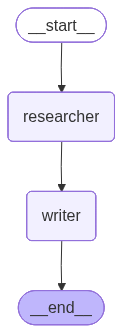

In [6]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state = {"topic": "Impact of renewable energy in India", "research": "", "draft": ""}
result = app.invoke(initial_state)

In [8]:
# -------------------------
# 7️⃣ Output
# -------------------------
print("=== FINAL STATE ===")
print(result)

=== FINAL STATE ===
{'topic': 'Impact of renewable energy in India', 'research': "The impact of renewable energy in India has been significant, with the country witnessing a substantial increase in the share of renewable energy in its total energy mix. As of 2022, India's renewable energy capacity stood at over 157 gigawatts (GW), with solar energy accounting for more than 40 GW and wind energy contributing over 38 GW, making it one of the world's largest producers of renewable energy. The shift towards renewable energy has helped India reduce its greenhouse gas emissions, improved energy security, and created employment opportunities in the rural sector, contributing to the country's climate change mitigation goals.", 'draft': "**Title:** India's Renewable Energy Revolution: A Milestone in Sustainability and Climate Action\n\n**Introduction:**\n\nIndia, one of the world's largest energy consumers, has witnessed a significant shift towards renewable energy in recent years. Driven by a 

In [9]:
from pprint import pprint

# assuming `result` contains your final state
print("=== FINAL STATE ===")
pprint(result)


=== FINAL STATE ===
{'draft': "**Title:** India's Renewable Energy Revolution: A Milestone in "
          'Sustainability and Climate Action\n'
          '\n'
          '**Introduction:**\n'
          '\n'
          "India, one of the world's largest energy consumers, has witnessed a "
          'significant shift towards renewable energy in recent years. Driven '
          'by a commitment to climate change mitigation, the country has made '
          'immense progress in reducing its reliance on fossil fuels and '
          'increasing its dependence on clean energy sources.\n'
          '\n'
          '**Renewable Energy Capacity:**\n'
          '\n'
          "As of 2022, India's renewable energy capacity surpassed 157 "
          'gigawatts (GW), with solar energy accounting for over 40 GW and '
          'wind energy contributing more than 38 GW. This impressive feat has '
          "catapulted India to one of the world's largest producers of "
          "renewable energy, signal

In [10]:
import json

print("=== FINAL STATE ===")
print(json.dumps(result, indent=4, ensure_ascii=False))



=== FINAL STATE ===
{
    "topic": "Impact of renewable energy in India",
    "research": "The impact of renewable energy in India has been significant, with the country witnessing a substantial increase in the share of renewable energy in its total energy mix. As of 2022, India's renewable energy capacity stood at over 157 gigawatts (GW), with solar energy accounting for more than 40 GW and wind energy contributing over 38 GW, making it one of the world's largest producers of renewable energy. The shift towards renewable energy has helped India reduce its greenhouse gas emissions, improved energy security, and created employment opportunities in the rural sector, contributing to the country's climate change mitigation goals.",
    "draft": "**Title:** India's Renewable Energy Revolution: A Milestone in Sustainability and Climate Action\n\n**Introduction:**\n\nIndia, one of the world's largest energy consumers, has witnessed a significant shift towards renewable energy in recent years.

In [11]:
from langsmith import Client
import os

client = Client(api_key=os.environ.get("LANGCHAIN_HANDLER_API_KEY"))

try:
    projects = list(client.list_projects())
    print("✅ Connected to LangSmith! Found projects:")
    for p in projects:
        print("-", p.name)
except Exception as e:
    print("❌ LangSmith connection failed:", e)


❌ LangSmith connection failed: Authentication failed for /sessions. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/sessions?limit=100&offset=0', '{"detail":"Invalid token"}')
